In [28]:
from sklearn.datasets import load_iris
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn import metrics
data = load_iris()
x = data.data
y = data.target

In [38]:
import numpy as np
class KNN_classifier :
    def __init__(self,k=3):
        self.k = k
    def fit(self,x,y):
        self.X = x
        self.Y = y
    
    def predict(self,xtest):
        predictions = []
        for x in xtest:
            distances = []
            for i,z in enumerate(self.X):
                dis = np.sqrt(np.sum((x - z)**2))
                distances.append((i,dis))
                
            distances.sort(key= lambda x:x[1])
            k_nearest = [self.Y[i] for i,_ in distances[:self.k]]
            
            predict = max(set(k_nearest),key=k_nearest.count)
            predictions.append(predict)
        
        return predictions

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
knn = KNN_classifier(5)
knn.fit(x_train,y_train)

In [41]:
y_predict = knn.predict(x_test)

In [42]:
metrics.accuracy_score(y_test,y_predict)

1.0

In [43]:
cm = metrics.confusion_matrix(y_test,y_predict)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


<AxesSubplot:>

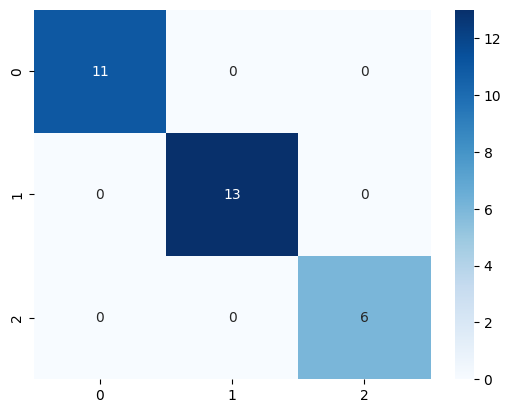

In [44]:
import seaborn as sns
sns.heatmap(cm,annot = True,cmap='Blues')